# Arpita Singh

In [174]:
#imported libraries
import pandas as pd   # to read dataset
import numpy as np    # to handle array
import matplotlib.pyplot as plt  # to visulaize dataset
from sklearn.ensemble import RandomForestClassifier #for using random forest model
from sklearn.tree import DecisionTreeClassifier  #for using decision tree model
from sklearn.metrics import accuracy_score #used confusion matrix for checking accuracy
%matplotlib inline

In [175]:
data=pd.read_csv(r"C:\Users\ARPITA SINGH\Desktop\Customer-Churn.csv") #imported csv file

In [176]:
data.head() #checking dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [177]:
data.info()  #getting info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [178]:
data.shape #shape of dataset

(7043, 21)

In [179]:
data.isnull().sum() #checking null or missing values  in dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [180]:
# Convert customerID to categorical
data['customerID'] = data['customerID'].astype('category')

# Convert gender to categorical and set custom levels
data['gender'] = data['gender'].astype('category')
data['gender'] = data['gender'].cat.set_categories(['Female', 'Male'])

# Convert SeniorCitizen to boolean
data['SeniorCitizen'] = data['SeniorCitizen'].astype(bool)

# Convert Partner, Dependents, PhoneService, PaperlessBilling, and Churn to categorical
cols_to_convert = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in cols_to_convert:
    data[col] = data[col].astype('category')

# Convert MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
# StreamingTV, StreamingMovies, and Contract to categorical with custom levels
cols_to_convert_custom_levels = {
    'MultipleLines': ['No phone service', 'No', 'Yes'],
    'InternetService': ['DSL', 'Fiber optic', 'No'],
    'OnlineSecurity': ['No', 'Yes', 'No internet service'],
    'OnlineBackup': ['Yes', 'No', 'No internet service'],
    'DeviceProtection': ['No', 'Yes', 'No internet service'],
    'TechSupport': ['No', 'Yes', 'No internet service'],
    'StreamingTV': ['No', 'Yes', 'No internet service'],
    'StreamingMovies': ['No', 'Yes', 'No internet service'],
    'Contract': ['Month-to-month', 'One year', 'Two year']
}
for col, levels in cols_to_convert_custom_levels.items():
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.set_categories(levels)

# Convert PaymentMethod to categorical with custom levels
payment_levels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
data['PaymentMethod'] = data['PaymentMethod'].astype('category')
data['PaymentMethod'] = data['PaymentMethod'].cat.set_categories(payment_levels)

# Display the data types of each column
print(data.dtypes)


customerID          category
gender              category
SeniorCitizen           bool
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn               category
dtype: object


In [181]:
# Drop columns 'customerID' and 'TotalCharges' from the DataFrame
data = data.drop(['customerID', 'TotalCharges'], axis=1)

# Display the updated DataFrame
print(data.head())


   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female          False     Yes         No       1           No   
1    Male          False      No         No      34          Yes   
2    Male          False      No         No       2          Yes   
3    Male          False      No         No      45           No   
4  Female          False      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [182]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

# Reset the index after dropping rows
data = data.reset_index(drop=True)

# Display the updated DataFrame shape
print(data.shape)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64
(7043, 19)


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Perform one-hot encoding on categorical variables
data_encoded = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 
                                         'MultipleLines', 'InternetService', 'OnlineSecurity',
                                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaperlessBilling', 'PaymentMethod'])

# Split the data into features (X) and target variable (y)
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7210787792760823


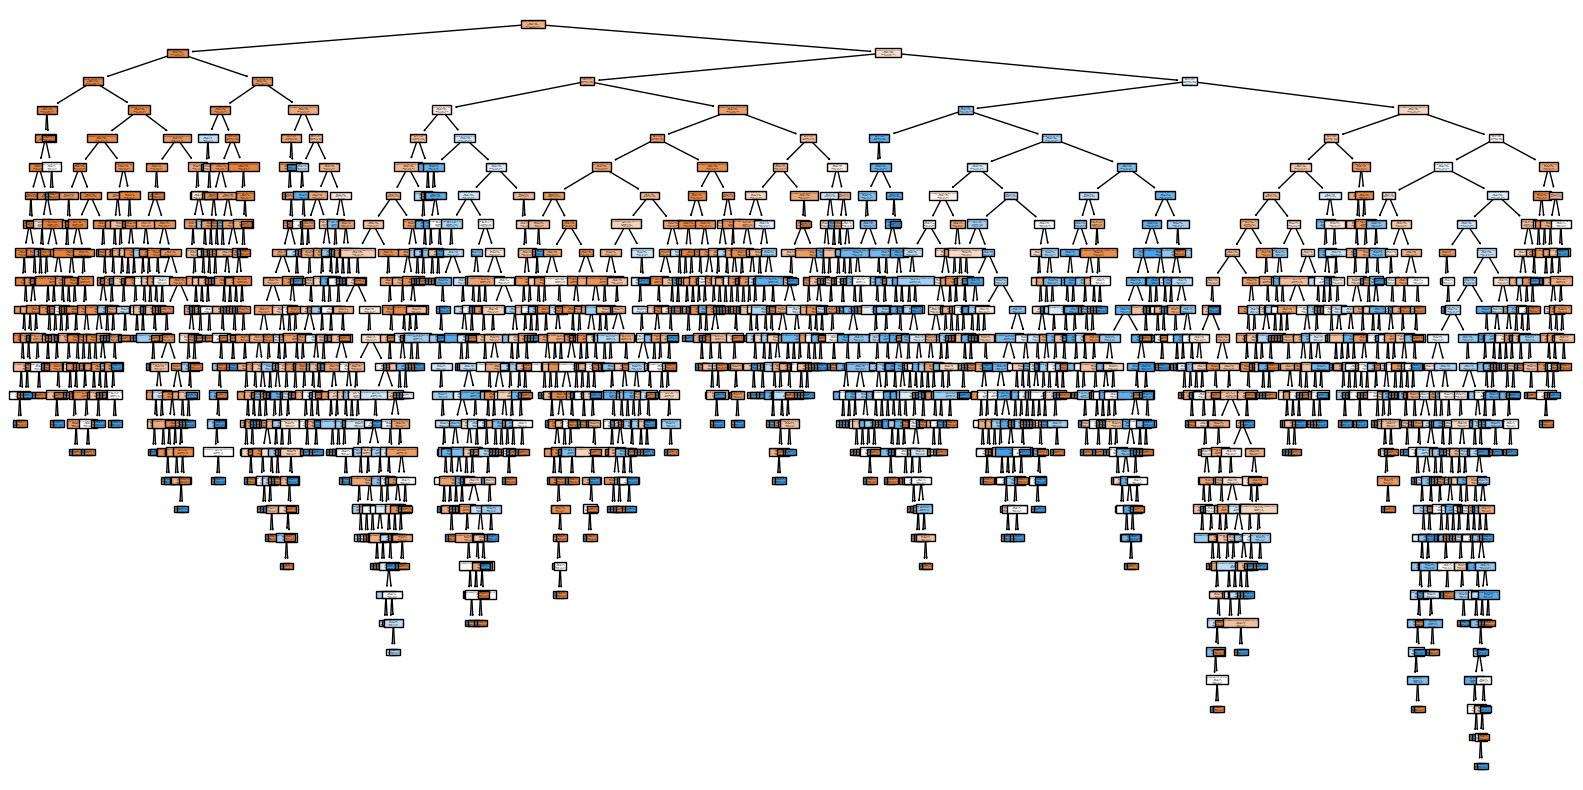

Confusion Matrix:
[[840 196]
 [197 176]]

Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.81      0.81      1036
         Yes       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [188]:
# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7899219304471257
Confusion Matrix:
[[939  97]
 [199 174]]


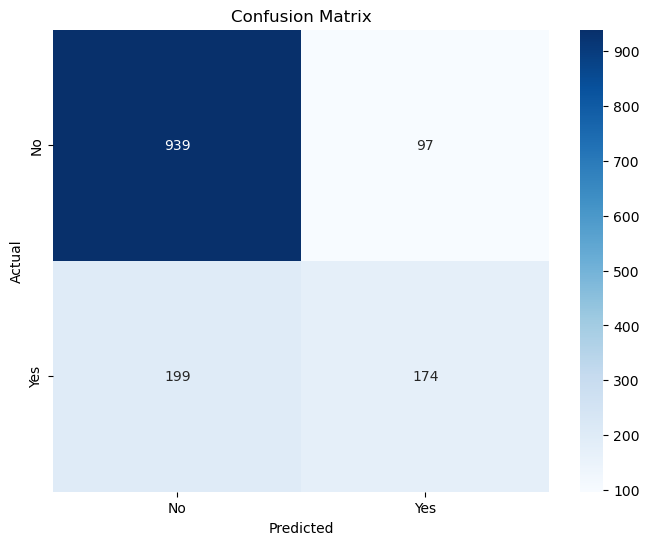

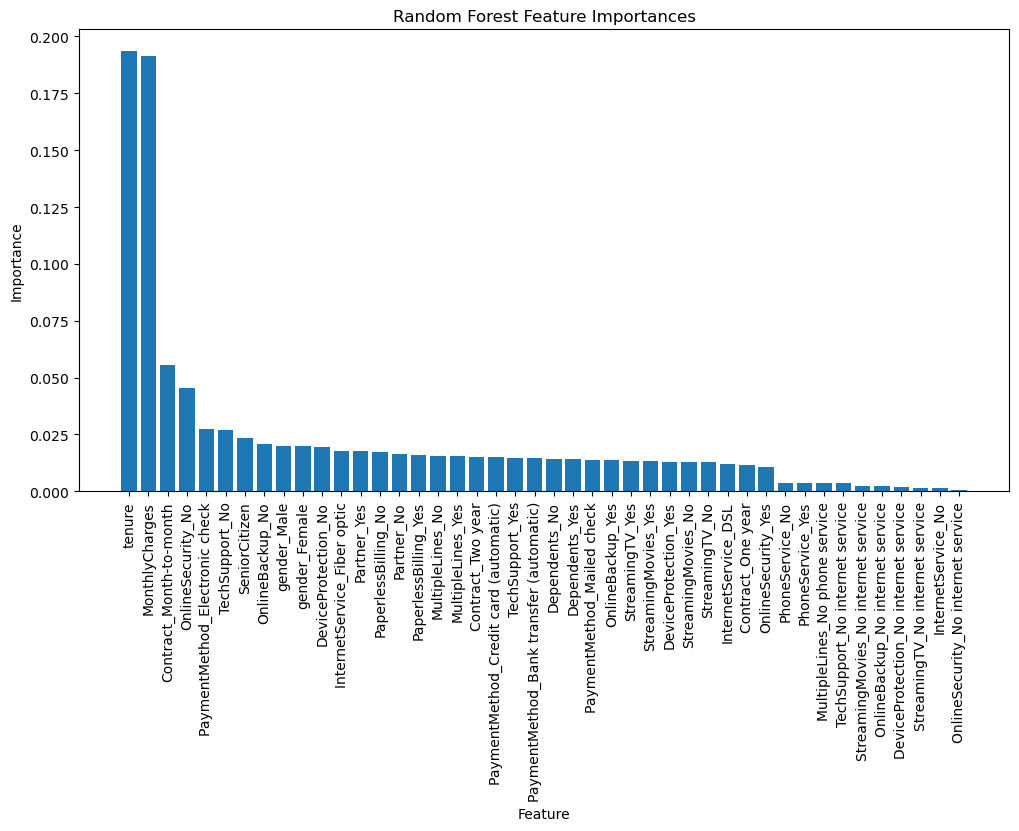

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=1234)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot variable importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()


# Decision tree analysis interpretation

Here's a concise summary for your project report:

Churn Rate Estimation: Based on the model's predictions and the provided data, the estimated churn rate is approximately 26.5%. This indicates that around 26.5% of customers are likely to churn.

Identification of Churned Customers: The model predicts which customers are likely to leave the company based on historical data and customer features. Customers with a higher predicted probability are more likely to churn according to the model. However, individual customer behavior may vary.

# Here's the interpretation of the random forest model results:

Accuracy: The model achieved an accuracy of approximately 78.99%, indicating that it correctly predicted the churn status for about 78.99% of the customers in the dataset.

Confusion Matrix:

True Positives (TP): 939 customers were correctly predicted as churn.
False Positives (FP): 97 customers were incorrectly predicted as churn.
True Negatives (TN): 174 customers were correctly predicted as not churn.
False Negatives (FN): 199 customers were incorrectly predicted as not churn.
Precision: Precision is the proportion of correctly predicted churn cases among all predicted churn cases. In this case, the precision for churn (Yes) is 939 / (939 + 97) ≈ 90.62%. This means that among all the customers predicted to churn, about 90.62% actually churned.

Recall: Recall is the proportion of correctly predicted churn cases among all actual churn cases. In this case, the recall for churn (Yes) is 939 / (939 + 199) ≈ 82.49%. This means that the model identified approximately 82.49% of all churn cases.

F1-Score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall). The weighted average F1-score in this case is approximately 78.99%.

Overall, the random forest model shows decent performance in predicting churn, with an accuracy of around 78.99%. However, there is room for improvement, especially in reducing false positives (customers incorrectly predicted to churn) and false negatives (customers incorrectly predicted to not churn).



